<a href="https://colab.research.google.com/github/gunjanak/Pytorch_Course/blob/main/5_Regression_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using regression on Concrete dataset.
Using GPU
Using different approaches such as :

*   Dropout
*   Batch normalization
*   Regularization
To reduce the train and test loss

Normalizing data with MinMaxScaler() and StandardScaler()
Trying different loss functions and optimizers



#Import

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

#Load data

In [3]:
# fetch dataset
concrete = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete.data.features
y = concrete.data.targets

In [4]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [7]:
seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

In [9]:
scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)


In [11]:
y_train_tensor = torch.tensor(y_train.values,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values,dtype=torch.float32)

In [12]:
# Move data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_inputs, train_labels = X_train_tensor.to(device), y_train_tensor.to(device)


In [13]:
from torch.utils.data import DataLoader, TensorDataset

In [14]:
# Create DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

#Basic DNN

In [15]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    #define the hidden layer
    self.input_to_hidden_layer = nn.Linear(8,20)
    #define activation function of hidden Layer
    self.hidden_layer_activation = nn.ReLU()

    #define hidden layer
    self.hidden_layer_to_hidden_layer = nn.Linear(20,40)
    self.hidden_layer_to_hidden_layer2 = nn.Linear(40,160)
    self.hidden_layer_to_hidden_layer3 = nn.Linear(160,80)
    self.hidden_layer_to_hidden_layer4 = nn.Linear(80,40)

    #define ourput layer
    self.hidden_to_output_layer = nn.Linear(40,1)



  #Define feed forward network based on above definitions
  def forward(self,x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer2(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer3(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer4(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)

    return x

#Adding Dropout

In [16]:
class NeuralNetwork_Dropout(nn.Module):
  def __init__(self,dropout_rate=0.2):
    super().__init__()
    #define the hidden layer
    self.input_to_hidden_layer = nn.Linear(8,20)
    #define activation function of hidden Layer
    self.hidden_layer_activation = nn.ReLU()

    #define hidden layer
    self.hidden_layer_to_hidden_layer = nn.Linear(20,40)
    self.hidden_layer_to_hidden_layer2 = nn.Linear(40,160)
    self.hidden_layer_to_hidden_layer3 = nn.Linear(160,80)
    self.hidden_layer_to_hidden_layer4 = nn.Linear(80,40)

    #define ourput layer
    self.hidden_to_output_layer = nn.Linear(40,1)

    # Define dropout with the specified rate
    self.dropout = nn.Dropout(p=dropout_rate)



  #Define feed forward network based on above definitions
  def forward(self,x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer2(x)
    x = self.hidden_layer_activation(x)
    x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer3(x)
    x = self.hidden_layer_activation(x)
    x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer4(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)

    return x

#Initialize weights

In [17]:
import torch.nn.init as init

In [18]:
class NeuralNetwork_Weights(nn.Module):
  def __init__(self,dropout_rate=0.2):
    super().__init__()
    #define the hidden layer
    self.input_to_hidden_layer = nn.Linear(8,20)
    #define activation function of hidden Layer
    self.hidden_layer_activation = nn.ReLU()

    #define hidden layer
    self.hidden_layer_to_hidden_layer = nn.Linear(20,40)
    self.hidden_layer_to_hidden_layer2 = nn.Linear(40,160)
    self.hidden_layer_to_hidden_layer3 = nn.Linear(160,80)
    self.hidden_layer_to_hidden_layer4 = nn.Linear(80,40)

    #define ourput layer
    self.hidden_to_output_layer = nn.Linear(40,1)

    # Define dropout with the specified rate
    self.dropout = nn.Dropout(p=dropout_rate)

    # Initialize weights
    init.xavier_uniform_(self.input_to_hidden_layer.weight)
    init.xavier_uniform_(self.hidden_layer_to_hidden_layer.weight)
    init.xavier_uniform_(self.hidden_layer_to_hidden_layer2.weight)
    init.xavier_uniform_(self.hidden_layer_to_hidden_layer3.weight)
    init.xavier_uniform_(self.hidden_layer_to_hidden_layer4.weight)
    init.xavier_uniform_(self.hidden_to_output_layer.weight)



  #Define feed forward network based on above definitions
  def forward(self,x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer2(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer3(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer4(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)

    return x

#Batch normalization

In [19]:
class NeuralNetwork_Batchnorm(nn.Module):
  def __init__(self,dropout_rate=0.2):
    super().__init__()
    self.input_bn = nn.BatchNorm1d(8)
    #define the hidden layer
    self.input_to_hidden_layer = nn.Linear(8,20)
    #define activation function of hidden Layer
    self.hidden_layer_activation = nn.ReLU()

    #define hidden layer
    self.hidden_layer_to_hidden_layer = nn.Linear(20,40)
    self.hidden_layer_to_hidden_layer2 = nn.Linear(40,160)
    self.hidden_layer_to_hidden_layer3 = nn.Linear(160,80)
    self.hidden_layer_to_hidden_layer4 = nn.Linear(80,40)

    #define ourput layer
    self.hidden_to_output_layer = nn.Linear(40,1)

    # Define dropout with the specified rate
    self.dropout = nn.Dropout(p=dropout_rate)

  #Define feed forward network based on above definitions
  def forward(self,x):
    x = self.input_bn(x)
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer2(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer3(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer_to_hidden_layer4(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)

    return x

#Regularization

In [20]:
import torch.nn.functional as F

In [21]:
class NeuralNetwork_l2(nn.Module):
  def __init__(self,dropout_rate=0.2,l2_lambda=1e-5):
    super().__init__()
    self.input_bn = nn.BatchNorm1d(8)
    #define the hidden layer
    self.input_to_hidden_layer = nn.Linear(8,20)
    #define activation function of hidden Layer
    self.hidden_layer_activation = nn.ReLU()

    #define hidden layer
    self.hidden_layer = nn.Linear(20,40)
    self.hidden_layer2 = nn.Linear(40,160)
    self.hidden_layer3 = nn.Linear(160,80)
    self.hidden_layer4 = nn.Linear(80,40)

    #define ourput layer
    self.hidden_to_output_layer = nn.Linear(40,1)

    # Define dropout with the specified rate
    self.dropout = nn.Dropout(p=dropout_rate)

    # Add L2 regularization to linear layers
    self.input_to_hidden_layer.weight.data = self.add_l2_regularization(self.input_to_hidden_layer.weight.data, l2_lambda)
    self.hidden_layer.weight.data = self.add_l2_regularization(self.hidden_layer.weight.data, l2_lambda)
    self.hidden_layer2.weight.data = self.add_l2_regularization(self.hidden_layer2.weight.data, l2_lambda)
    self.hidden_layer3.weight.data = self.add_l2_regularization(self.hidden_layer3.weight.data, l2_lambda)
    self.hidden_layer4.weight.data = self.add_l2_regularization(self.hidden_layer4.weight.data, l2_lambda)
    self.hidden_to_output_layer.weight.data = self.add_l2_regularization(self.hidden_to_output_layer.weight.data, l2_lambda)


  #Define feed forward network based on above definitions
  def forward(self,x):
    x = self.input_bn(x)
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer2(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer3(x)
    x = self.hidden_layer_activation(x)
    # x = self.dropout(x)
    x = self.hidden_layer4(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)

    return x

  def add_l2_regularization(self, weights, l2_lambda):
    return F.dropout(weights, p=l2_lambda, training=self.training)

#Train

In [36]:
import time

In [64]:
# Instantiate the model
model = NeuralNetwork().to(device)
# model = NeuralNetwork_Dropout().to(device)
model = NeuralNetwork_Weights().to(device)
# model = NeuralNetwork_Batchnorm().to(device)
# model = NeuralNetwork_l2().to(device)
train_losses = []
train_accuracies = []
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs= 1000

In [65]:
start_time = time.time()
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    train_losses.append(loss.cpu().detach().numpy())
    #Print training loss and accuracy every 10 epochs
    if(epoch+1)%100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f}')
total_training_time = time.time() - start_time
print(total_training_time)

Epoch [100/1000],Loss:25.6469
Epoch [200/1000],Loss:22.3418
Epoch [300/1000],Loss:14.5565
Epoch [400/1000],Loss:15.0060
Epoch [500/1000],Loss:14.0347
Epoch [600/1000],Loss:10.0827
Epoch [700/1000],Loss:17.1528
Epoch [800/1000],Loss:20.5974
Epoch [900/1000],Loss:17.2506
Epoch [1000/1000],Loss:14.0938
33.56350111961365


In [39]:
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt

3.7.1


Text(0, 0.5, 'Loss Values')

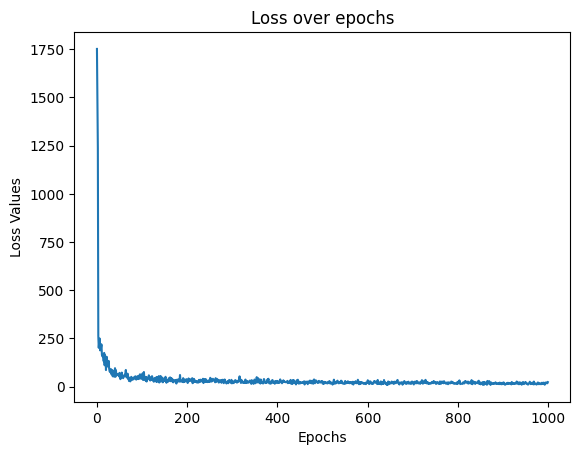

In [61]:
plt.plot(train_losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Values")

In [62]:
# Use the trained model for predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor.to(device))

# Compute the loss on the test set
criterion = nn.MSELoss()
test_loss = criterion(predictions.view(-1),y_test_tensor.to(device))

print("Test Loss:", test_loss.item())

Test Loss: 498.1435241699219


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([206, 1])) that is different to the input size (torch.Size([206])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert predictions and target labels to numpy arrays
predictions_np = predictions.view(-1).detach().cpu().numpy()
target_labels_np = y_test_tensor.numpy()

# Calculate additional metrics
mae = mean_absolute_error(target_labels_np, predictions_np)
mse = mean_squared_error(target_labels_np, predictions_np)
r2 = r2_score(target_labels_np, predictions_np)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 4.172069
Mean Squared Error: 34.727013
R-squared: 0.8652303843812553


#Using SGD to train

In [49]:
# Instantiate the model
model = NeuralNetwork().to(device)
# model = NeuralNetwork_Dropout().to(device)
# model = NeuralNetwork_Weights().to(device)
# model = NeuralNetwork_Batchnorm().to(device)
# model = NeuralNetwork_l2().to(device)
train_losses = []
train_accuracies = []
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs= 1000

In [50]:
start_time = time.time()
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    train_losses.append(loss.cpu().detach().numpy())
    #Print training loss and accuracy every 10 epochs
    if(epoch+1)%100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f}')
total_training_time = time.time() - start_time
print(total_training_time)

Epoch [100/1000],Loss:152.6371
Epoch [200/1000],Loss:30.0392
Epoch [300/1000],Loss:30.9895
Epoch [400/1000],Loss:19.1571
Epoch [500/1000],Loss:16.8420
Epoch [600/1000],Loss:11.5911
Epoch [700/1000],Loss:21.0741
Epoch [800/1000],Loss:9.7186
Epoch [900/1000],Loss:7.9483
Epoch [1000/1000],Loss:7.6387
28.273470878601074


#Using AdamW

In [55]:
# Instantiate the model
model = NeuralNetwork().to(device)
# model = NeuralNetwork_Dropout().to(device)
# model = NeuralNetwork_Weights().to(device)
# model = NeuralNetwork_Batchnorm().to(device)
# model = NeuralNetwork_l2().to(device)
train_losses = []
train_accuracies = []
criterion = nn.SmoothL1Loss()
optimizer = optim.AdamW(model.parameters(), lr=0.1)
epochs= 1000

In [56]:
start_time = time.time()
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    train_losses.append(loss.cpu().detach().numpy())
    #Print training loss and accuracy every 10 epochs
    if(epoch+1)%100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f}')
total_training_time = time.time() - start_time
print(total_training_time)

Epoch [100/1000],Loss:12.6003
Epoch [200/1000],Loss:14.5551
Epoch [300/1000],Loss:11.6679
Epoch [400/1000],Loss:15.2230
Epoch [500/1000],Loss:14.6318
Epoch [600/1000],Loss:14.0155
Epoch [700/1000],Loss:12.1119
Epoch [800/1000],Loss:12.7787
Epoch [900/1000],Loss:12.2341
Epoch [1000/1000],Loss:15.8051
34.98301029205322
